In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics




Get the Data and Analyse the Data

In [2]:
#loading the data set from csv file to a Pandas DataFrame
ins_data = pd.read_csv('insurance.csv')

In [3]:
#First 10 rows of data sets
ins_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
#number of columns and rows
ins_data.shape

(1338, 7)

In [5]:
#getting info about data set
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking missing values
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#Statistical Analysis of data
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\2001w\AppData\Local\Temp\ipykernel_37096\2857184949.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_data['age'])


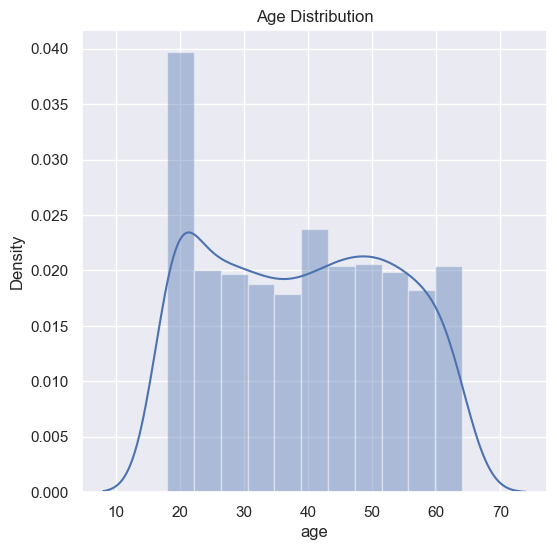

In [8]:
# Age distribution analysis
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(ins_data['age'])
plt.title('Age Distribution')
plt.show()

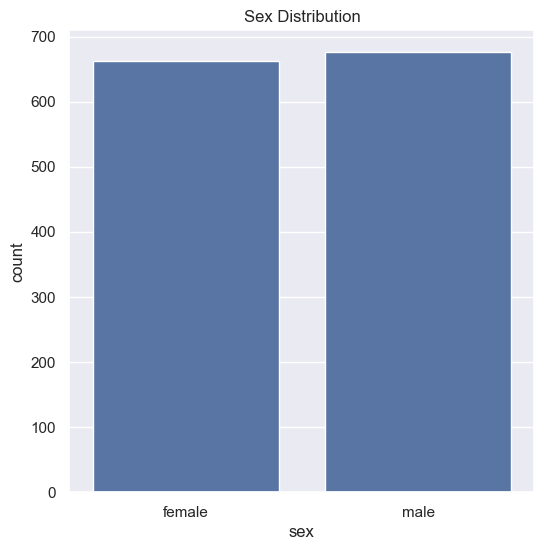

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
#Sex Distribution
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=ins_data)
plt.title('Sex Distribution')
plt.show()

ins_data['sex'].value_counts()

C:\Users\2001w\AppData\Local\Temp\ipykernel_37096\1608675781.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_data['bmi'])


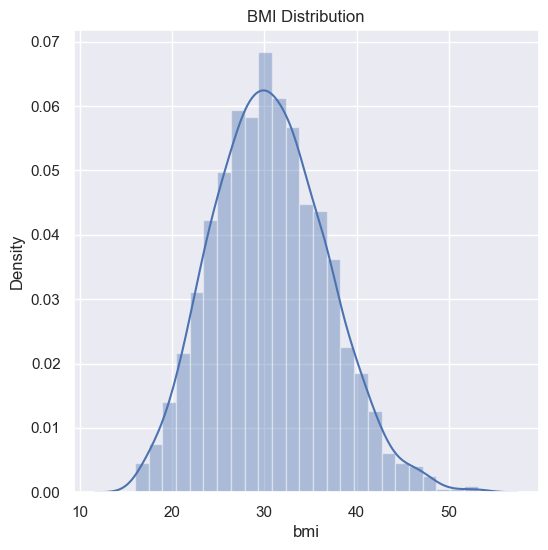

In [10]:
#BMI Distribution
plt.figure(figsize=(6,6))
sns.distplot(ins_data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [11]:

#Children Distribution
ins_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

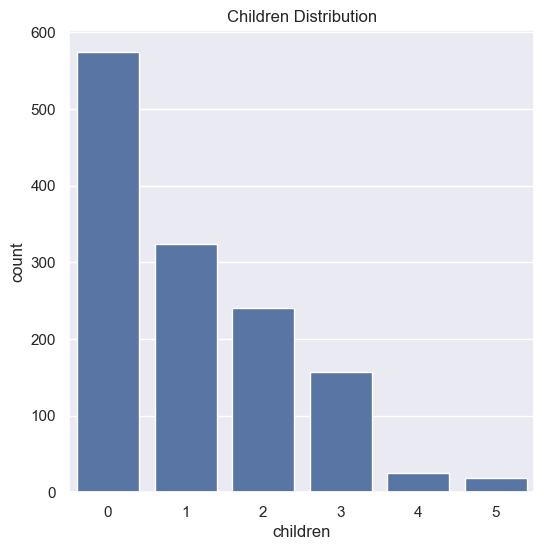

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=ins_data)
plt.title('Children Distribution')
plt.show()

In [13]:
#Smoking Distribution
ins_data['smoker'].value_counts()


smoker
no     1064
yes     274
Name: count, dtype: int64

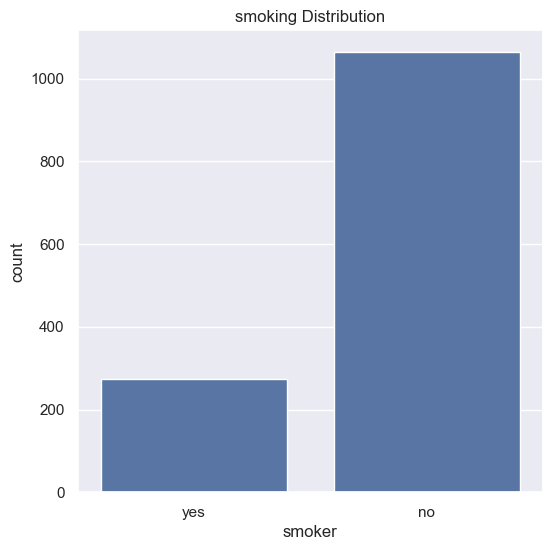

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=ins_data)
plt.title('smoking Distribution')
plt.show()

In [15]:
#Region column
ins_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

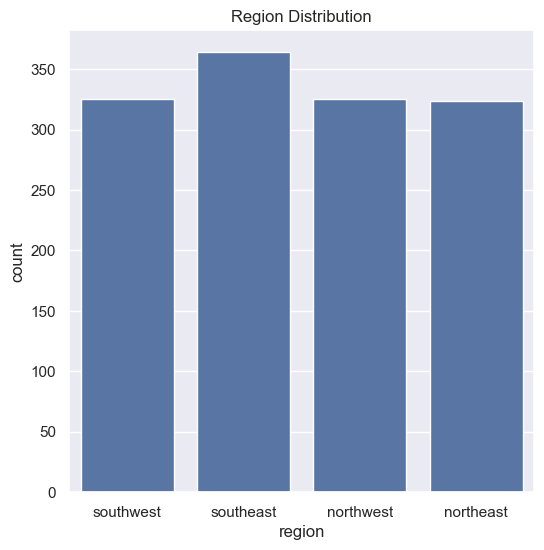

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=ins_data)
plt.title('Region Distribution')
plt.show()

C:\Users\2001w\AppData\Local\Temp\ipykernel_37096\3980804686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_data['charges'])


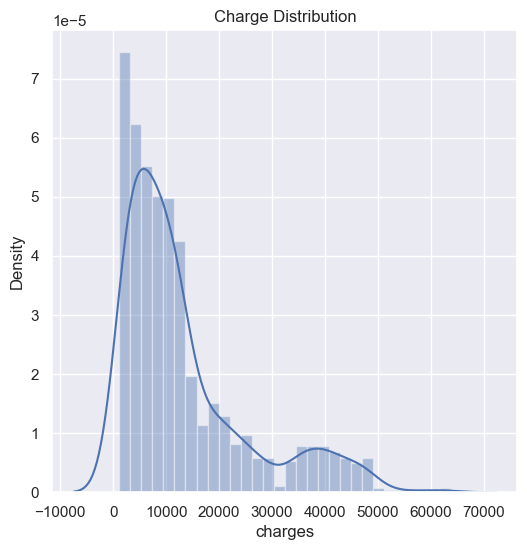

In [17]:
#charge Distribution
plt.figure(figsize=(6,6))
sns.distplot(ins_data['charges'])
plt.title('Charge Distribution')
plt.show()

Data Pre-Processing
Encoding the categorical features


In [18]:
# encoding sex column
ins_data.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding smoker column
ins_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#encoding region
ins_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

ins_data.head(10)




C:\Users\2001w\AppData\Local\Temp\ipykernel_37096\2814282759.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ins_data.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\2001w\AppData\Local\Temp\ipykernel_37096\2814282759.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ins_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\2001w\AppData\Local\Temp\ipykernel_37096\2814282759.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old b

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
5,31,1,25.740,0,1,0,3756.62160
6,46,1,33.440,1,1,0,8240.58960
7,37,1,27.740,3,1,3,7281.50560
8,37,0,29.830,2,1,2,6406.41070
9,60,1,25.840,0,1,3,28923.13692


Splitting the features and Target


In [19]:
X= ins_data.drop(columns='charges',axis=1)
Y=ins_data['charges']


Splitting the data into training data & Testing Data

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=2)



Model Training by linear Regression


Building a predictive System

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Ensure reproducibility
tf.random.set_seed(1234)

# Define the model architecture
model = Sequential(
    [
        Dense(6, activation='relu', name="L1"),
        Dense(10, activation='relu', name="L2"),
        Dense(1, activation='linear', name="L3")  # Final layer for regression
    ]
)

# Compile the model with a regression loss function
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # Suitable for regression tasks
    optimizer=tf.keras.optimizers.Adam(0.01),
)

# Fit the model on your training data
history = model.fit(
    X_train, Y_train,  # Make sure you have defined X_train and y_train correctly
    epochs=200
)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 322399840.0000
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 315972128.0000
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 288880192.0000
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 227463792.0000
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 158374080.0000
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 133556904.0000 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 132529504.0000
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 132154384.0000 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131845272.0000 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131564944.0000 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 131296936.0000 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 131037768.0000
Epoch 13/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 130784776.0000 
Epoch 14/200
34

In [22]:
#Y predictions from training data
Y_train_predicts_neural=model.predict(X_train)
#R squared values
R2_train_neural=metrics.r2_score(Y_train,Y_train_predicts_neural)
print('R squared value of training data set',R2_train_neural)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R squared value of training data set 0.821961977474721


In [23]:
#Y predictions from testing data
Y_test_predicts_neural=model.predict(X_test)
#R squared values
R2_test_neural=metrics.r2_score(Y_test,Y_test_predicts_neural)
print('R squared value of training data set',R2_test_neural)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
R squared value of training data set 0.8131374715880215


In [26]:
input_data = (37, 0, 29.83, 2, 1, 2)

# changing input data to numpy array
data_as_numpyarray = np.asarray(input_data)

# reshape the array
data_reshaped = data_as_numpyarray.reshape(1, -1)

# make prediction
prediction = model.predict(data_reshaped)

# convert prediction to a scalar value and print it
print(float(prediction[0]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
8082.92919921875


C:\Users\2001w\AppData\Local\Temp\ipykernel_37096\1827912047.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(prediction[0]))


In [25]:
import pickle
with open('insurance_prediction.pkl', 'wb') as f:
    pickle.dump((model), f)